In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from scipy import linalg as LA

# 3.2 Edge Expansion

In [2]:
def cut_score(g, set_A, set_B):
    """
    Parameters
    ----------
    g : nx.Graph
    set_A : list of int
        Vertices in the first set
    set_B : list of int
        Vertices in the second set
    
    Returns
    -------
    int
        Number of edges between the two sets of vertices
    """
    return nx.adjacency_matrix(g)[set_A][:, set_B].sum()

In [3]:
def cut_edge_expansion(g, set_A, set_B):
    """
    Parameters
    ----------
    g : nx.Graph
    set_A : list of int
        Vertices in the first set
    set_B : list of int
        Vertices in the second set
    
    Returns
    -------
    int
        Edge expansion of the cut (set_A, set_B).
    """
    num_cross_set_edges = nx.adjacency_matrix(g)[set_A][:, set_B].sum()
    num_edges_from_set_A = nx.adjacency_matrix(g)[set_A].sum()
    num_edges_from_set_B = nx.adjacency_matrix(g)[set_B].sum()
    return num_cross_set_edges / min(num_edges_from_set_A, num_edges_from_set_B)

Below gives an example for why **edge expansion** can be a better metric for evaluating graph cut than **cut score**. We draw the two sets of vertices with different colors.

/Users/mufei/miniconda3/envs/dgl-chem/lib/python3.6/site-packages/networkx-2.3-py3.6.egg/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


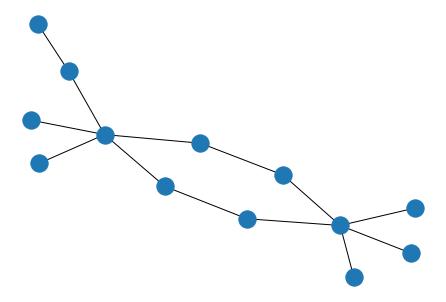

In [4]:
g = nx.star_graph(5)
g.add_edges_from([(6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (3, 7), (4, 8), (11, 12)])
pos = nx.spring_layout(g)
nx.draw(g, pos=pos)

In [5]:
def node_colors(set_A, set_B, set_A_color='orange', set_B_color='green'):
    """Assign node colors to reflect a graph cut.
    
    Parameters
    ----------
    set_A : list of int
        Vertices in the first set
    set_B : list of int
        Vertices in the second set
    set_A_color : str
        Color to use for vertices in the first set
    set_B_color : str
        Color to use for vertices in the second set
    """
    node_colors = [None for _ in range(len(set_A) + len(set_B))]
    for v in set_A:
        node_colors[v] = set_A_color
    for v in set_B:
        node_colors[v] = set_B_color
    return node_colors

In [6]:
def examine_a_cut(g, set_A, set_B, pos):
    """Draw a graph with a cut and calculate metrics for the cut.
    
    Parameters
    ----------
    g : nx.Graph
    set_A : list of int
        Vertices in the first set
    set_B : list of int
        Vertices in the second set
    pos : dict
        Mapping nodes to their coordinates in the plot
    """
    nx.draw(g, pos=pos, node_color=node_colors(set_A, set_B))
    print('cut score', cut_score(g, set_A, set_B))
    print('edge expansion', cut_edge_expansion(g, set_A, set_B))

cut score 1
edge expansion 1.0


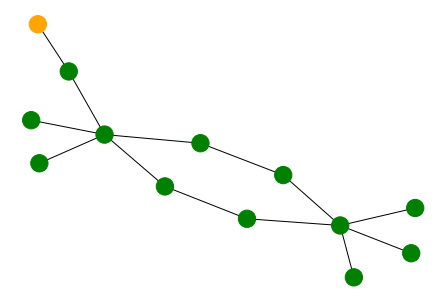

In [7]:
# Cut 1
A = [12]
B = list(range(12))
examine_a_cut(g, A, B, pos)

cut score 2
edge expansion 0.16666666666666666


/Users/mufei/miniconda3/envs/dgl-chem/lib/python3.6/site-packages/networkx-2.3-py3.6.egg/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


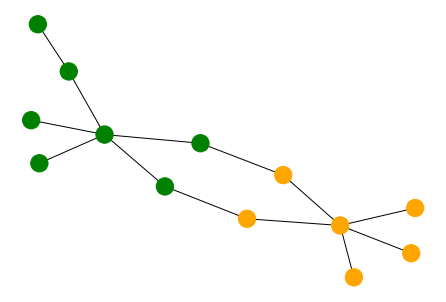

In [8]:
# Cut 1
A = list(range(6))
B = list(range(6, 13))
examine_a_cut(g, A, B, pos)

# 3.3 The Fiedler Value

In [9]:
def get_the_Fiedler_value(g):
    """
    Parameters
    ----------
    g : nx.Graph
    
    Returns
    -------
    float
        The second smallest eigenvalue
    """
    L = nx.normalized_laplacian_matrix(g).todense()
    eigenval, eigenvec = LA.eigh(L)
    return eigenval[1]

In [10]:
# Erdős-Rényi chooses each edge with probability p
for p in np.linspace(0, 1, 11):
    erdos_g = nx.gnp_random_graph(20, p=p)
    print('The Fiedler value is {:.4f} when p is {:.4f}'.format(get_the_Fiedler_value(erdos_g), p))

The Fiedler value is 0.0000 when p is 0.0000
The Fiedler value is 0.0000 when p is 0.1000
The Fiedler value is 0.3248 when p is 0.2000
The Fiedler value is 0.3897 when p is 0.3000
The Fiedler value is 0.6056 when p is 0.4000
The Fiedler value is 0.5663 when p is 0.5000
The Fiedler value is 0.7185 when p is 0.6000
The Fiedler value is 0.7701 when p is 0.7000
The Fiedler value is 0.8230 when p is 0.8000
The Fiedler value is 0.9297 when p is 0.9000
The Fiedler value is 1.0526 when p is 1.0000


In [11]:
def Fiedler_approximate_optimal_cut(g, x=None):
    """
    Parameters
    ----------
    g : nx.Graph
    x : 1D np array or list
    """
    if x is None:
        L = nx.normalized_laplacian_matrix(g).todense()
        eigenval, eigenvec = LA.eigh(L)
        x = eigenvec[:, 1]
    
    relabeled_nodes = np.argsort(x)
    min_cut_edge_expansion = float('inf')
    for i in range(1, g.number_of_nodes()):
        set_A, set_B = relabeled_nodes[:i], relabeled_nodes[i:]
        edge_expansion = cut_edge_expansion(g, set_A, set_B)
        if edge_expansion < min_cut_edge_expansion:
            min_cut_edge_expansion = edge_expansion
            best_cut = (set_A, set_B)
    return best_cut

cut score 2
edge expansion 0.16666666666666666


/Users/mufei/miniconda3/envs/dgl-chem/lib/python3.6/site-packages/networkx-2.3-py3.6.egg/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


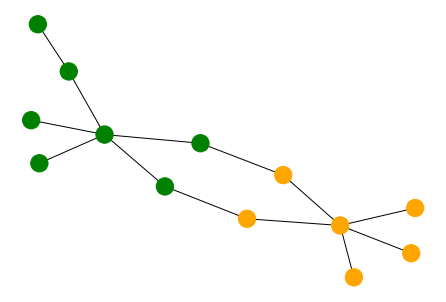

In [12]:
A, B = Fiedler_approximate_optimal_cut(g)
examine_a_cut(g, A, B, pos)

/Users/mufei/miniconda3/envs/dgl-chem/lib/python3.6/site-packages/networkx-2.3-py3.6.egg/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


cut score 6
edge expansion 0.5


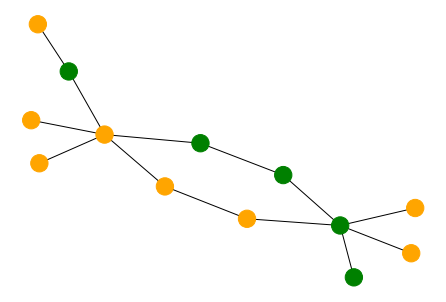

In [13]:
A, B = Fiedler_approximate_optimal_cut(g, np.random.rand(g.number_of_nodes()))
examine_a_cut(g, A, B, pos)